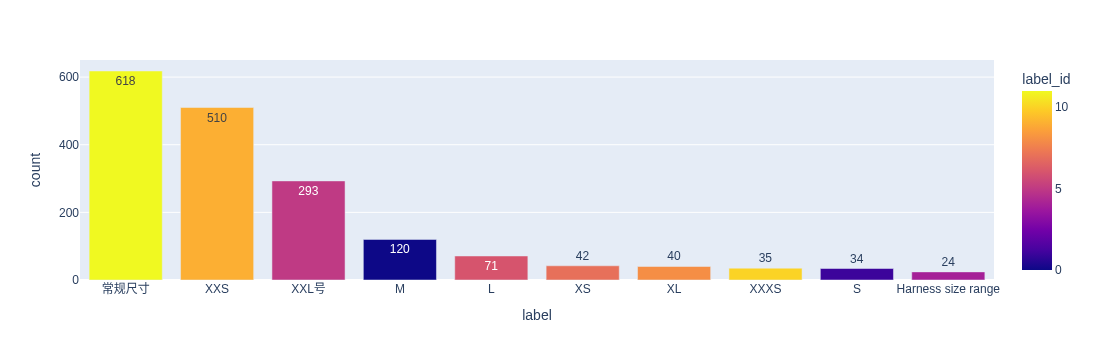

In [6]:
import pandas as pd
import plotly.express as px
from collections import Counter
import random

# 读取 CSV
# file_path = './labeled/needs-1755761585.6115475.csv'
# file_path = "./labeled/summarize-1755767478.1369212.csv"
# file_path = "./labeled/颜色-1755768275.464413.csv"
# file_path = "./labeled/尺寸-1755768834.9017708.csv"
#file_path = "./labeled/summarize-1755832235.5945387.csv"
file_path = "./labeled/尺寸-1755854548.3942108.csv"


column_name = "尺寸"
df = pd.read_csv(file_path)

# 移除 needs 为空的行，方便后续处理
df[column_name] = df[column_name].fillna('')  # 空字符串替代 NaN

# 按 label_id 分组
grouped = df.groupby(['label_id', 'label'])

# 构造柱状图数据
data = []
for (label_id, label), group in grouped:
	count = len(group)
	needs_list = group[column_name].tolist()
	# 统计最多的 needs
	most_common_needs = Counter(needs_list).most_common(1)
	most_common_str = most_common_needs[0][0] if most_common_needs else ''
	# 随机选取 10 个 needs
	sample_needs = random.sample(needs_list, min(10, len(needs_list)))
	sample_str = ", ".join(sample_needs)
	hover_text = f"label: {label}<br>label_id: {label_id}<br>最多的 {column_name}: {most_common_str}<br>随机 10 个 {column_name}: {sample_str}<br>数量: {count}"
	data.append({
		'label': label,
		'label_id': label_id,
		'count': count,
		'hover': hover_text
	})

plot_df = pd.DataFrame(data)

# 按 count 从大到小排序
plot_df = plot_df.sort_values('count', ascending=False)

# 绘图
fig = px.bar(
	plot_df,
	x='label',
	y='count',
	color='label_id',
	text='count',
	hover_data={'hover': True, 'label': False, 'label_id': False, 'count': False},
	custom_data=['hover']
)

# 自定义悬停信息
fig.update_traces(hovertemplate='%{customdata[0]}')

# 输出 HTML
fig.write_html('cache.html')

# 展示
fig.show()

# 输出 HTML
fig.write_html(f'{column_name}-emb-zero-shot.html')